# Covid 19 forecasting
## Data validation (Daily cases)

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data_frame=pd.read_csv('recovered_data.csv')

In [6]:
data_frame.head()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Recovered,9,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
1,15-Mar-20,2020-03-15,Recovered,4,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
2,16-Mar-20,2020-03-16,Recovered,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,17-Mar-20,2020-03-17,Recovered,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,18-Mar-20,2020-03-18,Recovered,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
stationary_cols=[]
non_stationary_cols=[]

In [9]:
#h0=It is not stationary
#h1=It is stationary
def adfuller_test(data):
    results=adfuller(data)
    h0='It is not stationary'
    h1='It is stationary'
    labels=['test_statistic','p value','lags used','number of observations used']
    for lab,val in zip(labels,results[:4]):
        print('{} : {}'.format(lab,val))
    print('---------------------------------------------------')   
    print('p value',results[1])
    if results[1]<=0.05:
        print('Reject h0')
        print(h1)
        print('Weak evidence that the given data is not stationary')
        stationary_cols.append(data.name)
    else:
        print('Accecpt h0')
        print(h0)
        print('Strong evidence that the given data is not stationary')
        non_stationary_cols.append(data.name)

In [10]:
data_frame['TT'].name

'TT'

In [11]:
#adfuller test for total cases
adfuller_test(data_frame['TT'])

test_statistic : -3.6918252429180396
p value : 0.004229619837349494
lags used : 16
number of observations used : 554
---------------------------------------------------
p value 0.004229619837349494
Reject h0
It is stationary
Weak evidence that the given data is not stationary


In [12]:
#adfuller test for the features of different regions
for cols in data_frame.columns[4:]:
    print('Test for ',cols)
    adfuller_test(data_frame[cols])
    print('-------------------------------------------------------------------------------')

Test for  AN
test_statistic : -3.615834275711047
p value : 0.005465426847178629
lags used : 17
number of observations used : 553
---------------------------------------------------
p value 0.005465426847178629
Reject h0
It is stationary
Weak evidence that the given data is not stationary
-------------------------------------------------------------------------------
Test for  AP
test_statistic : -4.050963749358831
p value : 0.001165945904708472
lags used : 14
number of observations used : 556
---------------------------------------------------
p value 0.001165945904708472
Reject h0
It is stationary
Weak evidence that the given data is not stationary
-------------------------------------------------------------------------------
Test for  AR
test_statistic : -2.5935201017637035
p value : 0.09434394012893504
lags used : 18
number of observations used : 552
---------------------------------------------------
p value 0.09434394012893504
Accecpt h0
It is not stationary
Strong evidence that 

test_statistic : -2.399018523671199
p value : 0.14201361477209995
lags used : 18
number of observations used : 552
---------------------------------------------------
p value 0.14201361477209995
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary
-------------------------------------------------------------------------------
Test for  OR
test_statistic : -4.149815213686225
p value : 0.0008003353093042345
lags used : 19
number of observations used : 551
---------------------------------------------------
p value 0.0008003353093042345
Reject h0
It is stationary
Weak evidence that the given data is not stationary
-------------------------------------------------------------------------------
Test for  PY
test_statistic : -3.6788173841361687
p value : 0.004421166878495063
lags used : 16
number of observations used : 554
---------------------------------------------------
p value 0.004421166878495063
Reject h0
It is stationary
Weak evidence that the given d

In [13]:
print(stationary_cols)
print('--------------------------')
print(non_stationary_cols)

['TT', 'AN', 'AP', 'BR', 'DN', 'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'MP', 'MH', 'OR', 'PY', 'PB', 'RJ', 'TG', 'UP', 'UT']
--------------------------
['AR', 'AS', 'CH', 'CT', 'DD', 'KL', 'LA', 'LD', 'MN', 'ML', 'MZ', 'NL', 'SK', 'TN', 'TR', 'WB', 'UN']


In [14]:
#h0=It is not stationary
#h1=It is stationary
def repeat_adfuller_test(data):
    cols_after_differencing=[]
    results=adfuller(data)
    h0='It is not stationary'
    h1='It is stationary'
    labels=['test_statistic','p value','lags used','number of observations used']
    for lab,val in zip(labels,results[:4]):
        print('{} : {}'.format(lab,val))
    print('---------------------------------------------------')   
    print('p value',results[1])
    if results[1]<=0.05:
        print('Reject h0')
        print(h1)
        print('Weak evidence that the given data is not stationary')
        cols_after_differencing.append(data.name)
        #stationary_cols.append(data.name)
    else:
        print('Accecpt h0')
        print(h0)
        print('Strong evidence that the given data is not stationary')
        #non_stationary_cols.append(data.name)
    return cols_after_differencing

Test for  AR
test_statistic : -2.5946020818473245
p value : 0.09411804745296981
lags used : 18
number of observations used : 545
---------------------------------------------------
p value 0.09411804745296981
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


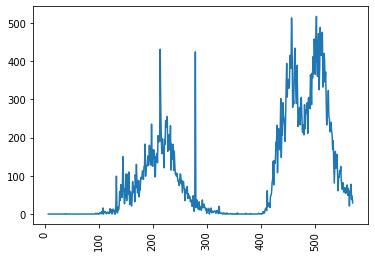

---------------------------------------------------------------------
Test for  AS
test_statistic : -2.314377450057815
p value : 0.16737287743294388
lags used : 18
number of observations used : 545
---------------------------------------------------
p value 0.16737287743294388
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


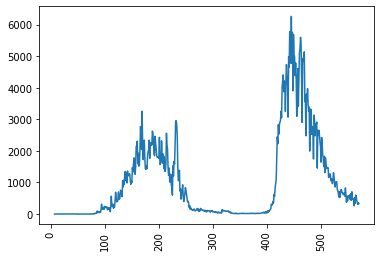

---------------------------------------------------------------------
Test for  CH
test_statistic : -2.6553660347954
p value : 0.08208542444263306
lags used : 6
number of observations used : 557
---------------------------------------------------
p value 0.08208542444263306
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


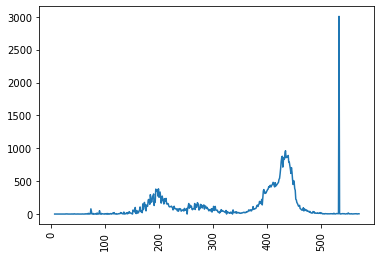

---------------------------------------------------------------------
Test for  CT
test_statistic : -2.766615749887778
p value : 0.06320297176146004
lags used : 19
number of observations used : 544
---------------------------------------------------
p value 0.06320297176146004
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


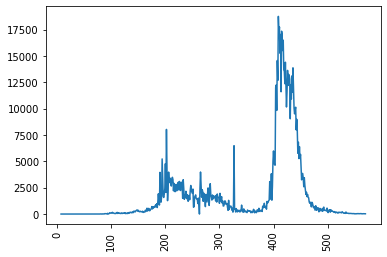

---------------------------------------------------------------------
Test for  DD
test_statistic : nan
p value : nan
lags used : 0
number of observations used : 563
---------------------------------------------------
p value nan
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


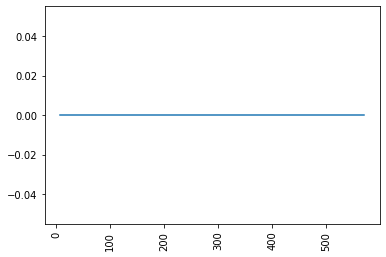

---------------------------------------------------------------------
Test for  KL
test_statistic : -2.5183865498411206
p value : 0.11106452975375852
lags used : 14
number of observations used : 549
---------------------------------------------------
p value 0.11106452975375852
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


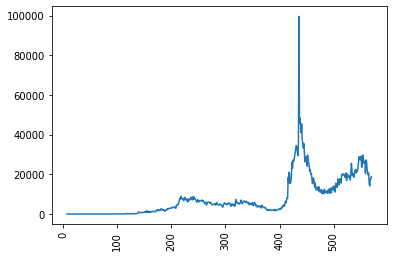

---------------------------------------------------------------------
Test for  LA
test_statistic : -2.3132511373612434
p value : 0.1677298259082225
lags used : 6
number of observations used : 557
---------------------------------------------------
p value 0.1677298259082225
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


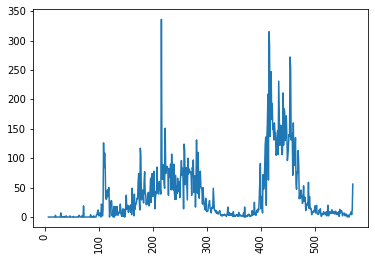

---------------------------------------------------------------------
Test for  LD
test_statistic : -2.5174621979669185
p value : 0.1112831871698734
lags used : 13
number of observations used : 550
---------------------------------------------------
p value 0.1112831871698734
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


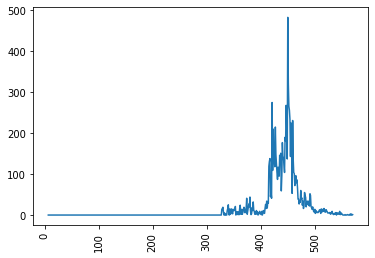

---------------------------------------------------------------------
Test for  MN
test_statistic : -1.5441359418421834
p value : 0.5115760223665626
lags used : 14
number of observations used : 549
---------------------------------------------------
p value 0.5115760223665626
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


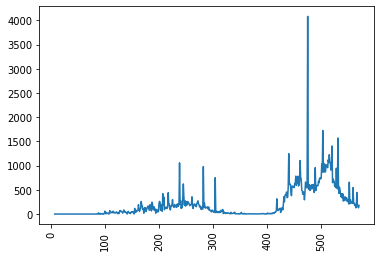

---------------------------------------------------------------------
Test for  ML
test_statistic : -2.0229701938199907
p value : 0.2765931640495761
lags used : 13
number of observations used : 550
---------------------------------------------------
p value 0.2765931640495761
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


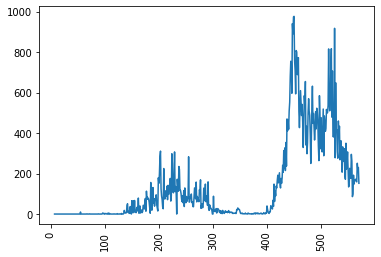

---------------------------------------------------------------------
Test for  MZ
test_statistic : 1.0225918952669697
p value : 0.9944986913295973
lags used : 15
number of observations used : 548
---------------------------------------------------
p value 0.9944986913295973
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


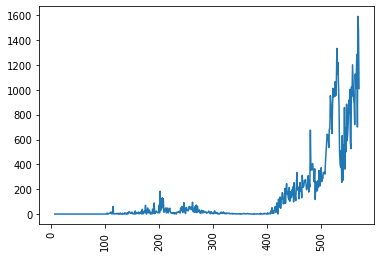

---------------------------------------------------------------------
Test for  NL
test_statistic : -2.394793869835185
p value : 0.14321119526047066
lags used : 18
number of observations used : 545
---------------------------------------------------
p value 0.14321119526047066
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


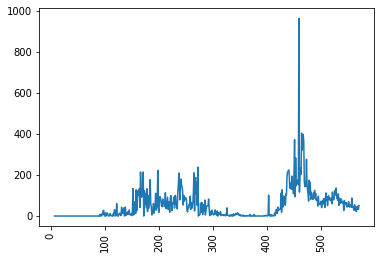

---------------------------------------------------------------------
Test for  SK
test_statistic : -2.0378119146151263
p value : 0.27024383043212064
lags used : 14
number of observations used : 549
---------------------------------------------------
p value 0.27024383043212064
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


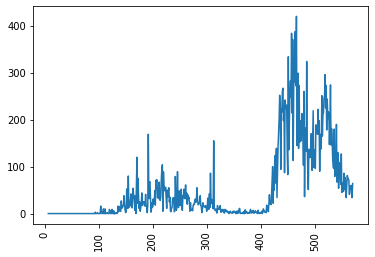

---------------------------------------------------------------------
Test for  TN
test_statistic : -2.315435935397115
p value : 0.16703789331677643
lags used : 17
number of observations used : 546
---------------------------------------------------
p value 0.16703789331677643
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


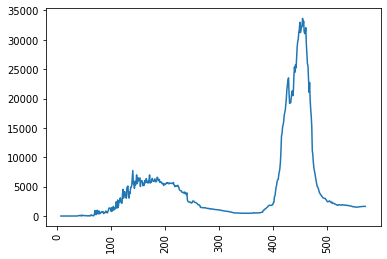

---------------------------------------------------------------------
Test for  TR
test_statistic : -2.5125733969471287
p value : 0.11244497691842392
lags used : 16
number of observations used : 547
---------------------------------------------------
p value 0.11244497691842392
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


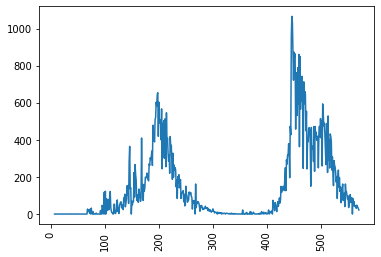

---------------------------------------------------------------------
Test for  WB
test_statistic : -2.790217008414794
p value : 0.059684844265242086
lags used : 3
number of observations used : 560
---------------------------------------------------
p value 0.059684844265242086
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


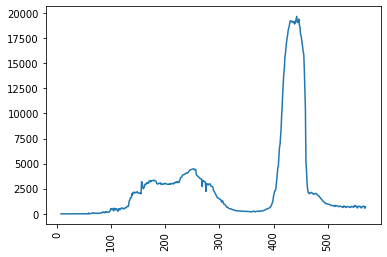

---------------------------------------------------------------------
Test for  UN
test_statistic : nan
p value : nan
lags used : 0
number of observations used : 563
---------------------------------------------------
p value nan
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


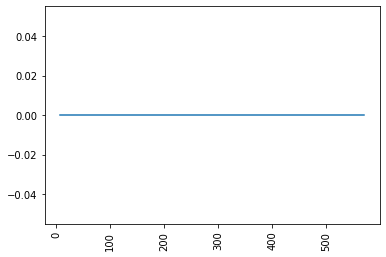

---------------------------------------------------------------------


In [15]:
#repeating adfuller test for the features which are not stationary.
for cols in non_stationary_cols:
    print('Test for ',cols)
    data=data_frame.copy()
    data[cols]=data[cols].shift(7)
    repeat_adfuller_test(data[cols].dropna())
    data[cols].plot()
    plt.xticks(rotation=90)
    plt.show()
    print('---------------------------------------------------------------------')

In [16]:
from pandas.plotting import autocorrelation_plot

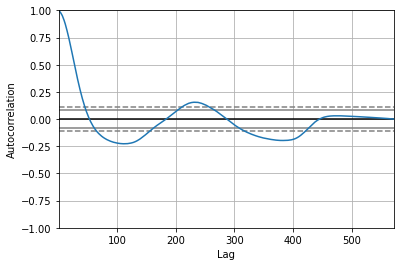

In [17]:
autocorrelation_plot(data_frame['TT']);

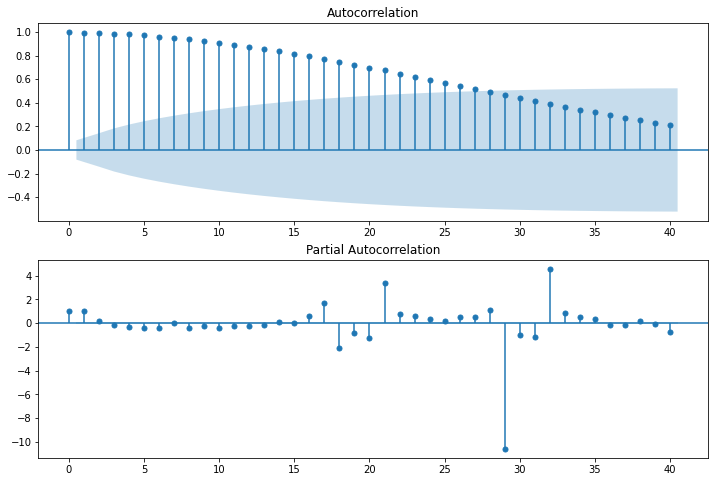

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data_frame['TT'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data_frame['TT'],lags=40,ax=ax2)

In [19]:
#30 day difference
data=data_frame.copy()

In [20]:
data['new_tt']=data['TT'].shift(7)

In [21]:
data.head(20)

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,RJ,SK,TN,TG,TR,UP,UT,WB,UN,new_tt
0,14-Mar-20,2020-03-14,Recovered,9,0,0,0,0,0,0,...,1,0,0,0,0,4,0,0,0,NaN
1,15-Mar-20,2020-03-15,Recovered,4,0,0,0,0,0,0,...,2,0,0,1,0,0,0,0,0,NaN
2,16-Mar-20,2020-03-16,Recovered,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,NaN
3,17-Mar-20,2020-03-17,Recovered,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,NaN
4,18-Mar-20,2020-03-18,Recovered,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
5,19-Mar-20,2020-03-19,Recovered,5,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,NaN
6,20-Mar-20,2020-03-20,Recovered,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
7,21-Mar-20,2020-03-21,Recovered,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
8,22-Mar-20,2020-03-22,Recovered,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
9,23-Mar-20,2020-03-23,Recovered,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


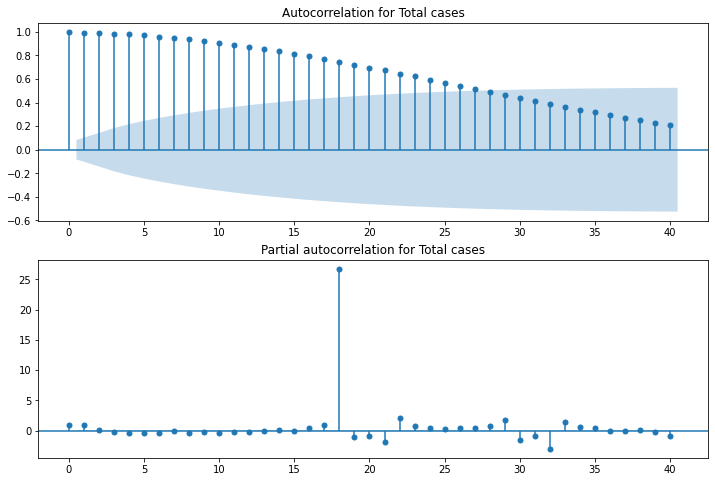

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data['new_tt'].iloc[7:],lags=40,ax=ax1,title='Autocorrelation for Total cases')
ax2 = fig.add_subplot(212)
fig = plot_pacf(data['new_tt'].iloc[7:],lags=40,ax=ax2,title='Partial autocorrelation for Total cases')

In [23]:
short_forms=[]
for i in data_frame.columns[4:]:
    short_forms.append(i)

In [24]:
abbreviations=['Andaman and Nicobar Islands','Andhra Pradesh','Arunachal Pradesh','Assam','Bihar','Chandigarh','Chhattisgarh',
              'Dadra and Nagar Haveli','Daman and Diu','Delhi','Goa','Gujarat','Haryana',
              'Himachal Pradesh','Jammu and Kashmir','Jharkhand','Karnataka','Kerala','Ladakh','Lakshadweep',
              'Madhya Pradesh','Maharashtra','Manipur','Meghalaya','Mizoram','Nagaland','Orissa','Pondicherry',
              'Punjab','Rajasthan','Sikkim','Tamil Nadu','Telangana','Tripura','Uttar Pradesh','Uttarakhand',
              'West Bengal','Union Territories']

## Plotting all the features of different that are not classified as stationary or non-stationary data.

ACF and PACF for  Andaman and Nicobar Islands


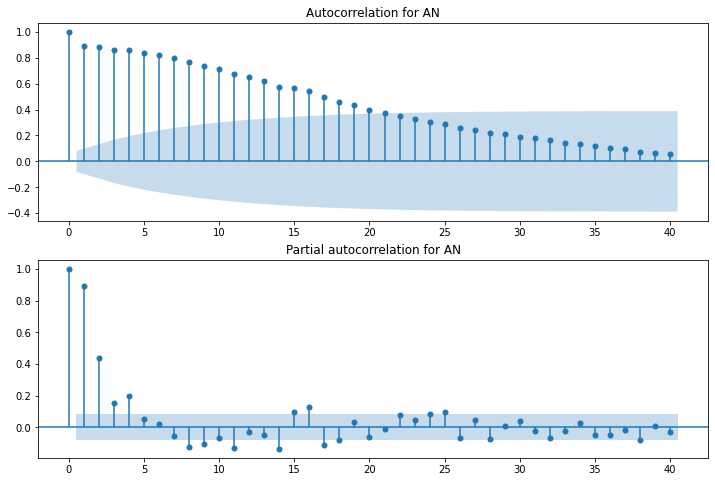

----------------------------------------------------------------------------------------------
ACF and PACF for  Andhra Pradesh


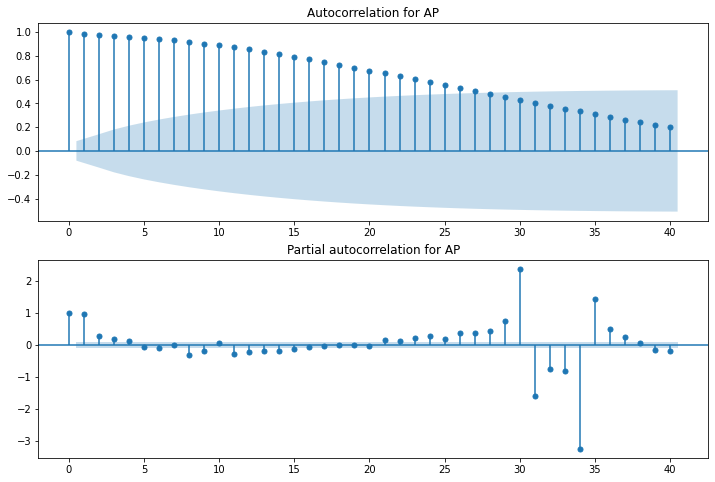

----------------------------------------------------------------------------------------------
ACF and PACF for  Arunachal Pradesh


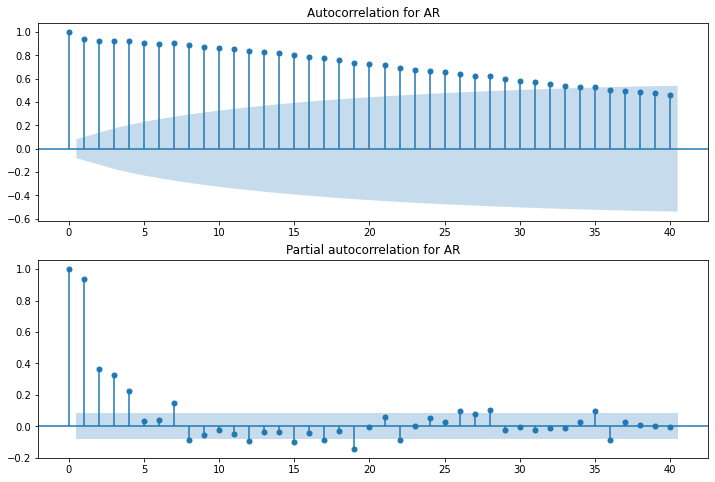

----------------------------------------------------------------------------------------------
ACF and PACF for  Assam


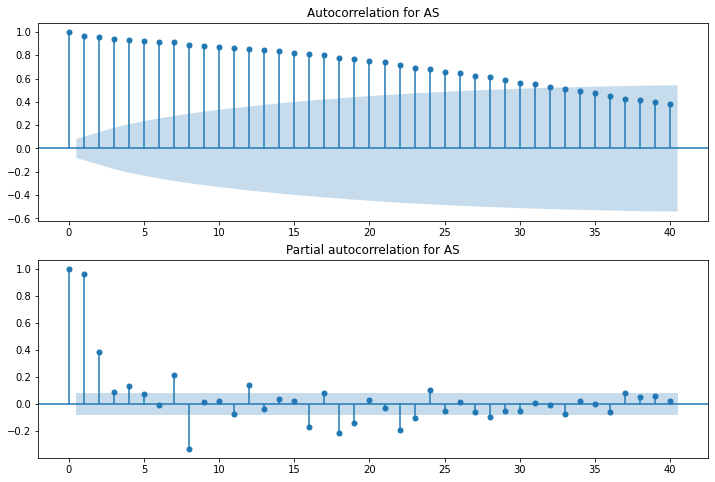

----------------------------------------------------------------------------------------------
ACF and PACF for  Bihar


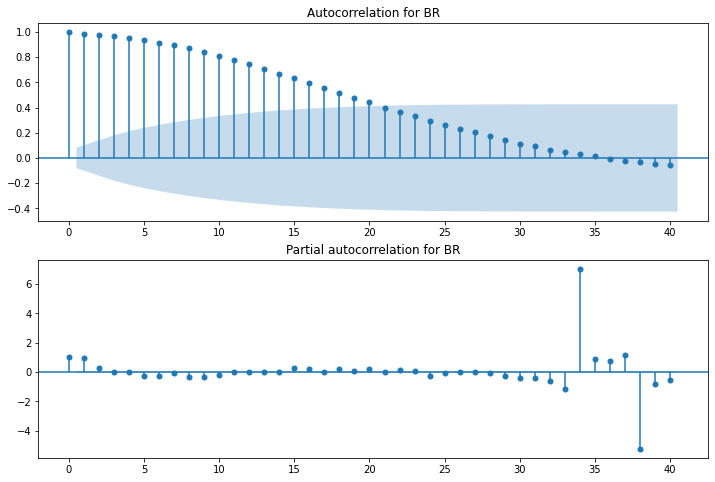

----------------------------------------------------------------------------------------------
ACF and PACF for  Chandigarh


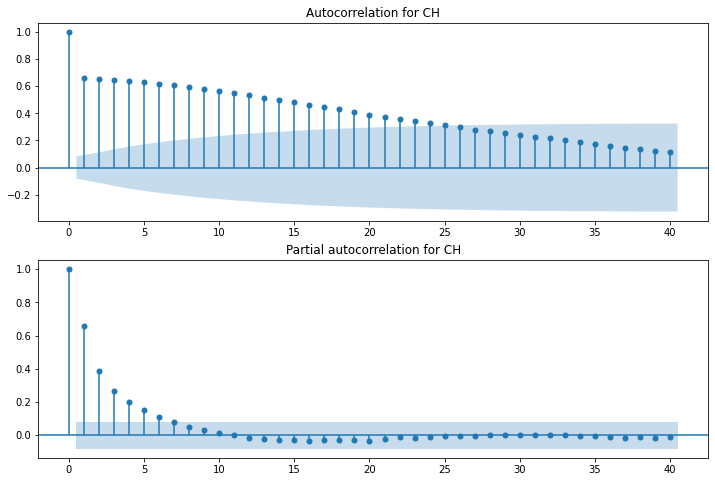

----------------------------------------------------------------------------------------------
ACF and PACF for  Chhattisgarh


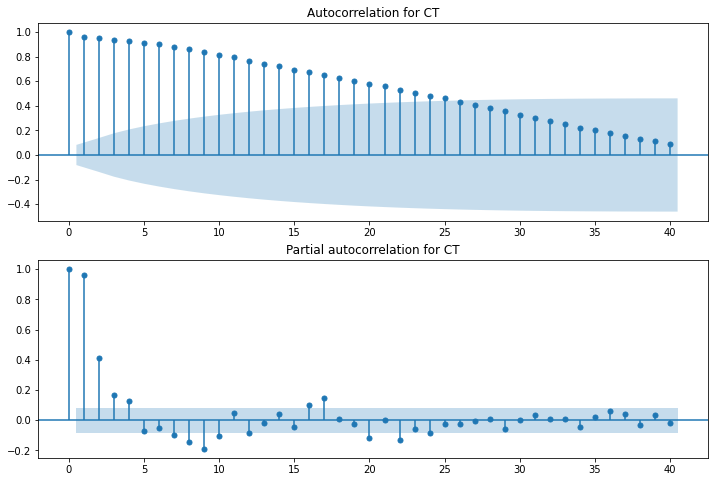

----------------------------------------------------------------------------------------------
ACF and PACF for  Dadra and Nagar Haveli


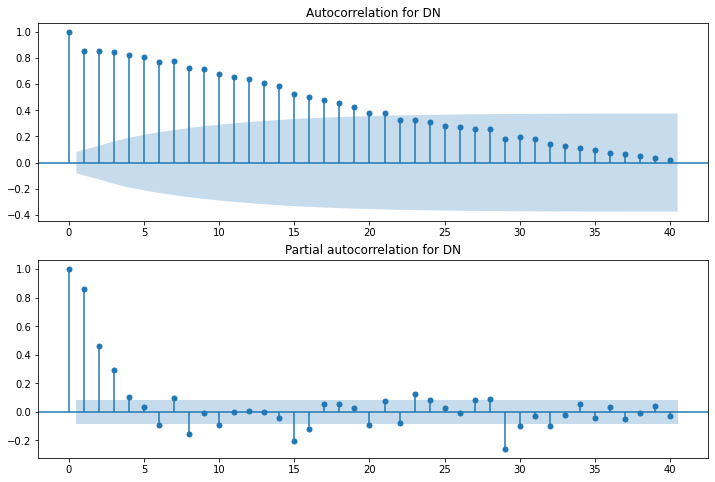

----------------------------------------------------------------------------------------------
ACF and PACF for  Daman and Diu
This feature cannot be plotted for autocorrelation and partial autocorrelation
----------------------------------------------------------------------------------------------
ACF and PACF for  Delhi


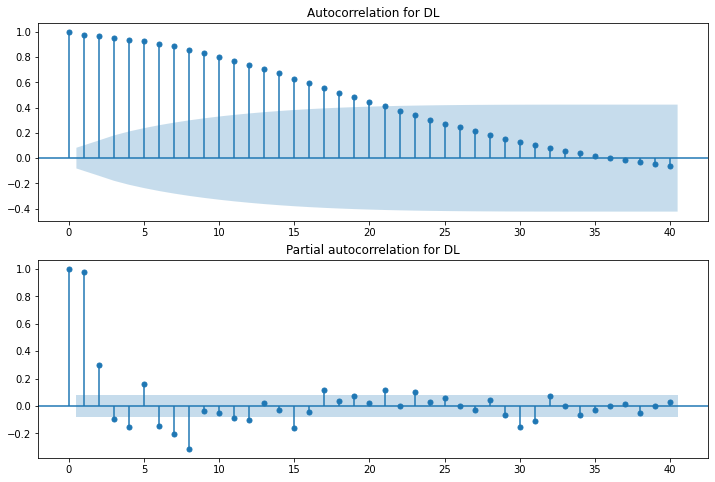

----------------------------------------------------------------------------------------------
ACF and PACF for  Goa


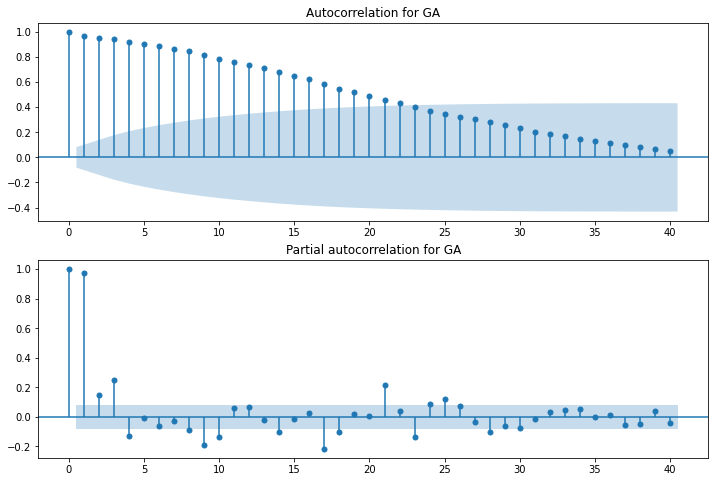

----------------------------------------------------------------------------------------------
ACF and PACF for  Gujarat


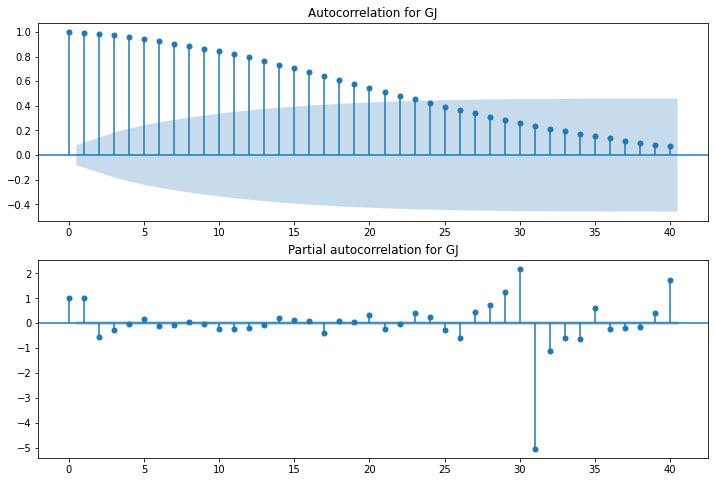

----------------------------------------------------------------------------------------------
ACF and PACF for  Haryana


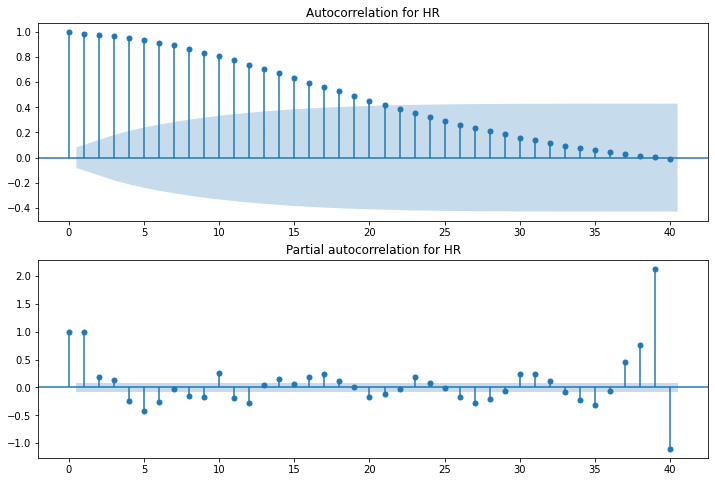

----------------------------------------------------------------------------------------------
ACF and PACF for  Himachal Pradesh


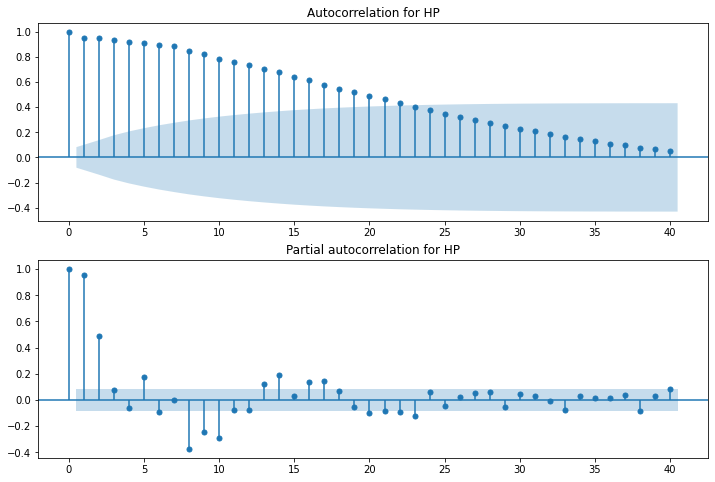

----------------------------------------------------------------------------------------------
ACF and PACF for  Jammu and Kashmir


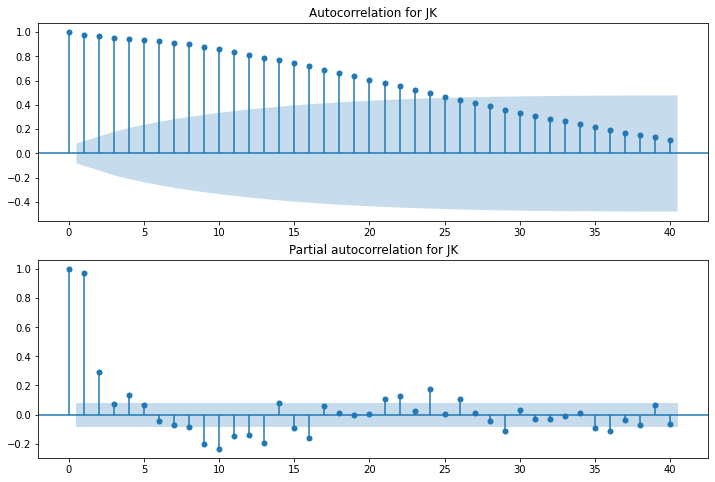

----------------------------------------------------------------------------------------------
ACF and PACF for  Jharkhand


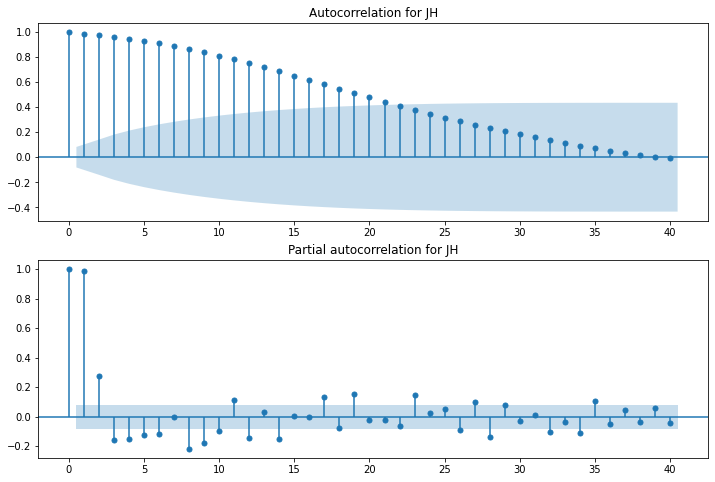

----------------------------------------------------------------------------------------------
ACF and PACF for  Karnataka


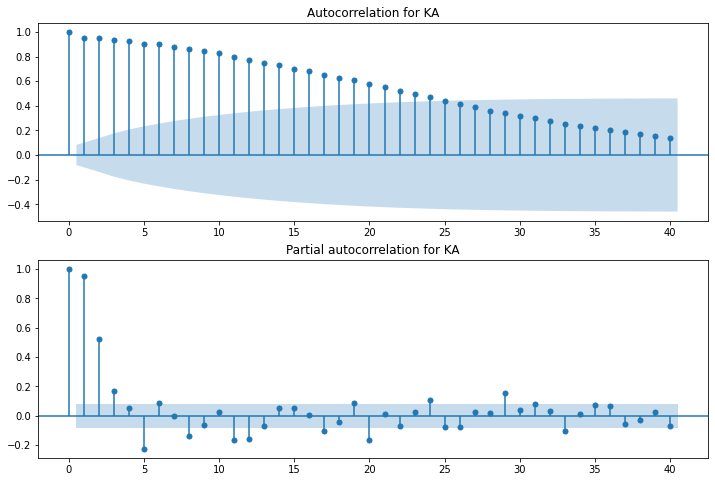

----------------------------------------------------------------------------------------------
ACF and PACF for  Kerala


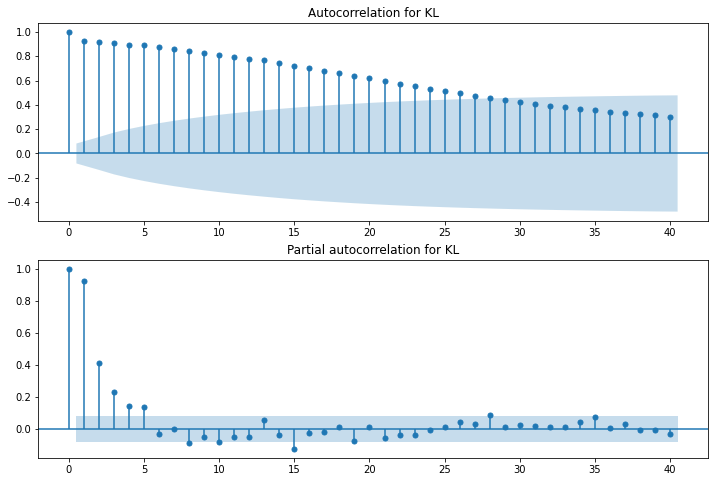

----------------------------------------------------------------------------------------------
ACF and PACF for  Ladakh


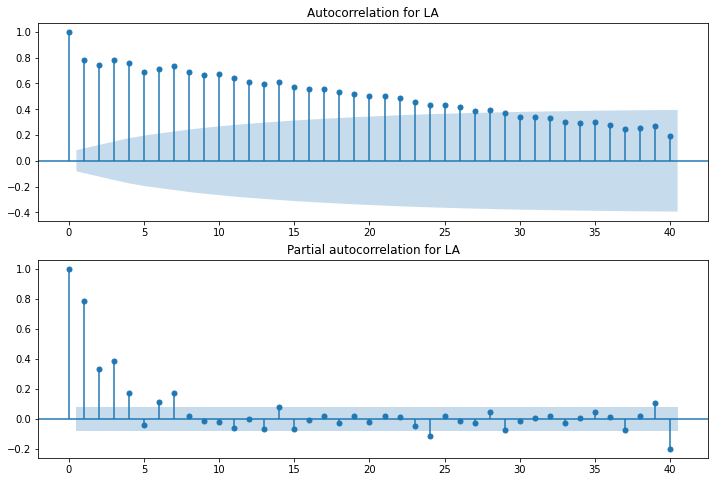

----------------------------------------------------------------------------------------------
ACF and PACF for  Lakshadweep


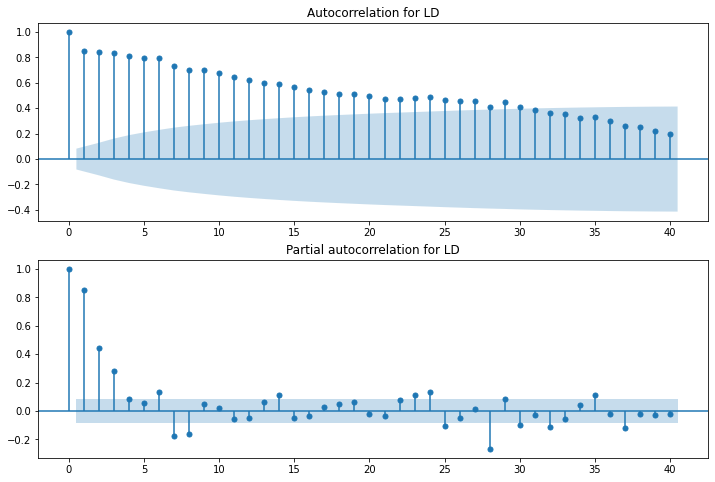

----------------------------------------------------------------------------------------------
ACF and PACF for  Madhya Pradesh


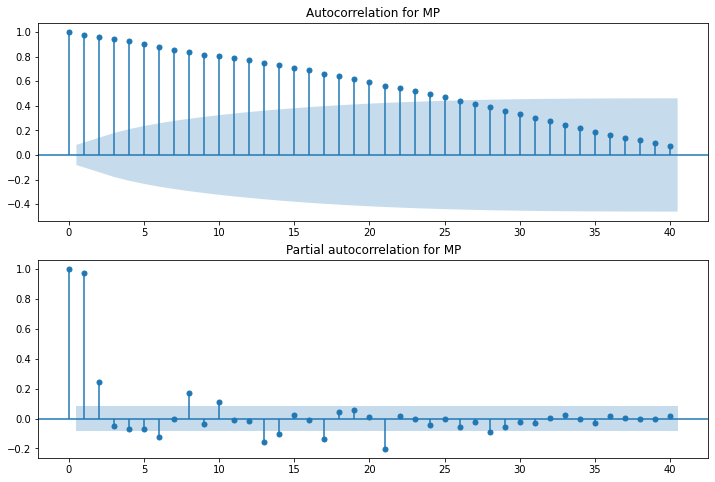

----------------------------------------------------------------------------------------------
ACF and PACF for  Maharashtra


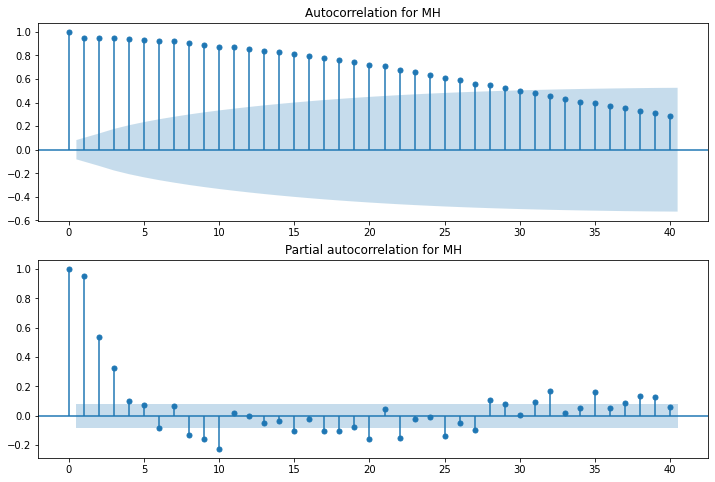

----------------------------------------------------------------------------------------------
ACF and PACF for  Manipur


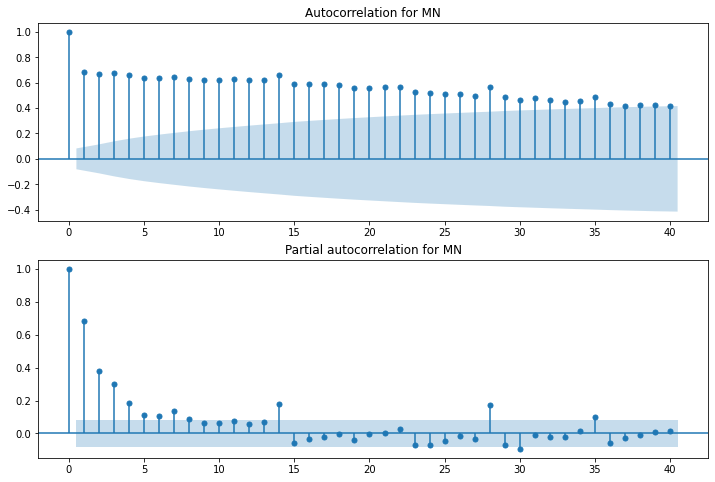

----------------------------------------------------------------------------------------------
ACF and PACF for  Meghalaya


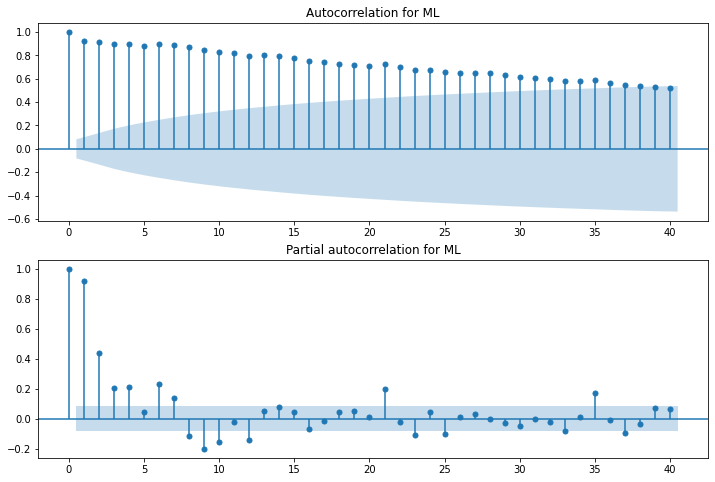

----------------------------------------------------------------------------------------------
ACF and PACF for  Mizoram


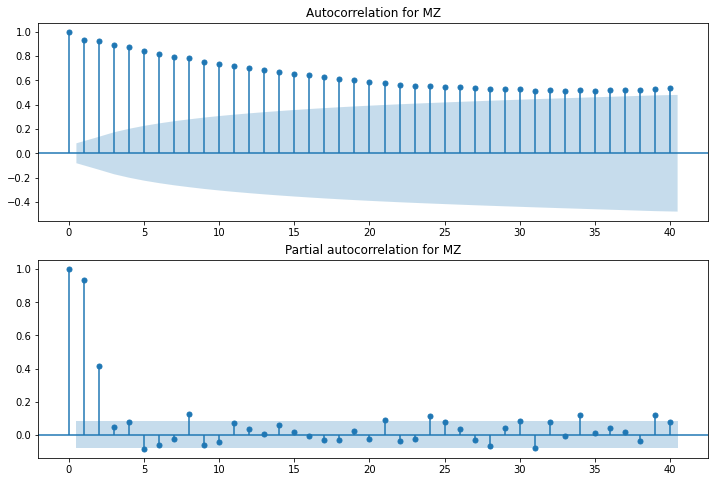

----------------------------------------------------------------------------------------------
ACF and PACF for  Nagaland


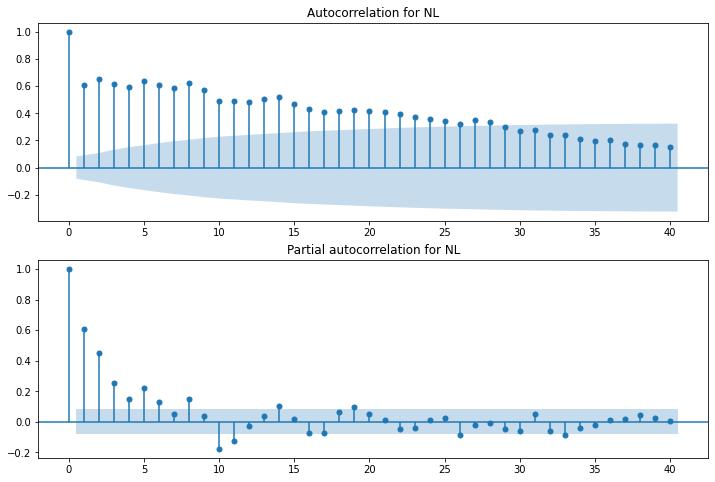

----------------------------------------------------------------------------------------------
ACF and PACF for  Orissa


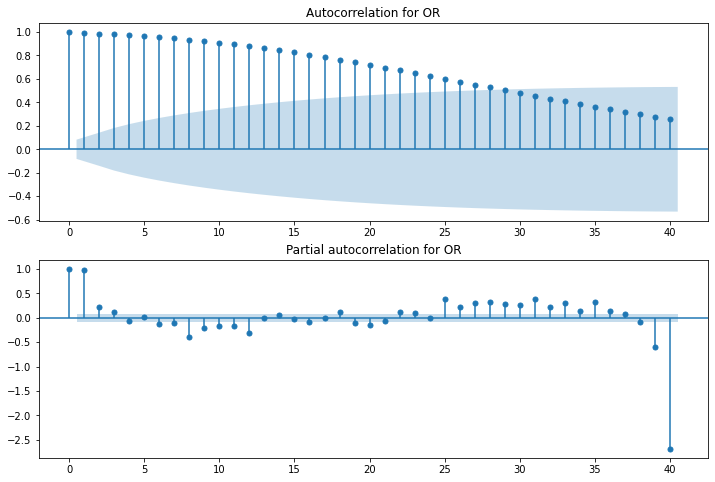

----------------------------------------------------------------------------------------------
ACF and PACF for  Pondicherry


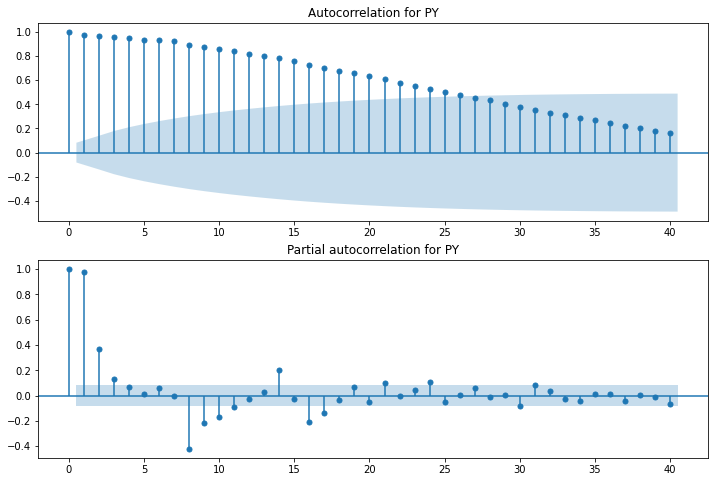

----------------------------------------------------------------------------------------------
ACF and PACF for  Punjab


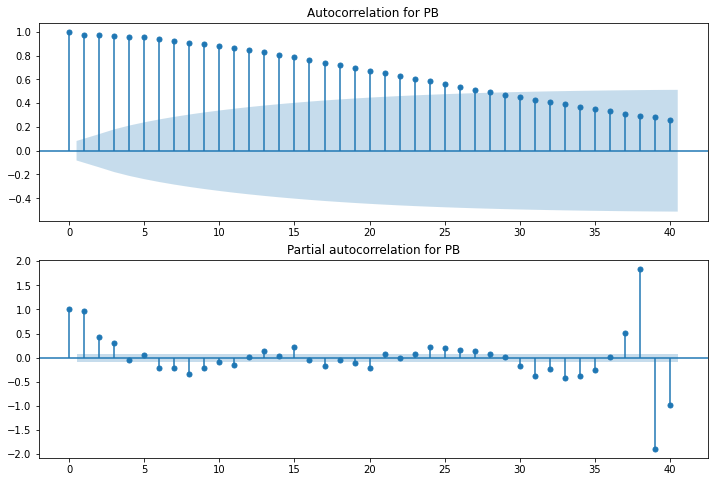

----------------------------------------------------------------------------------------------
ACF and PACF for  Rajasthan


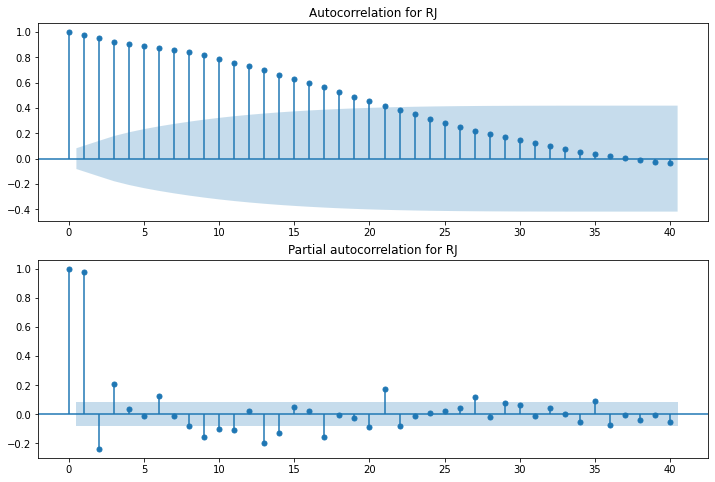

----------------------------------------------------------------------------------------------
ACF and PACF for  Sikkim


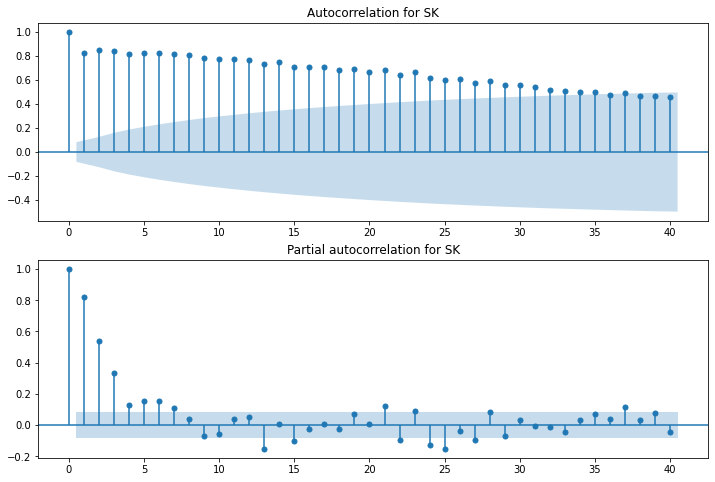

----------------------------------------------------------------------------------------------
ACF and PACF for  Tamil Nadu


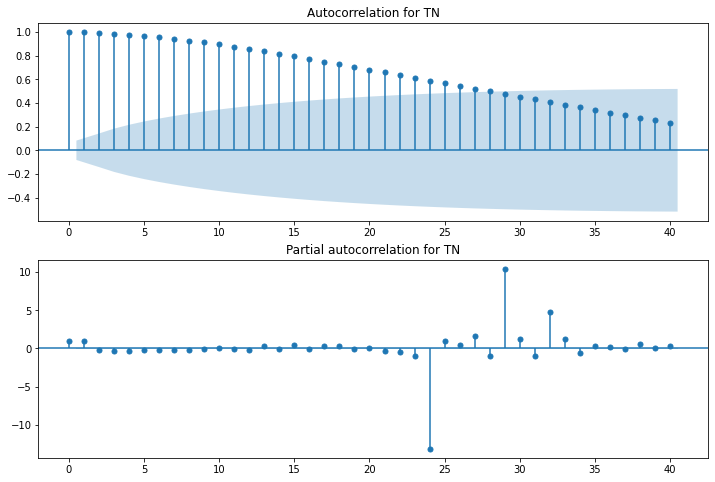

----------------------------------------------------------------------------------------------
ACF and PACF for  Telangana


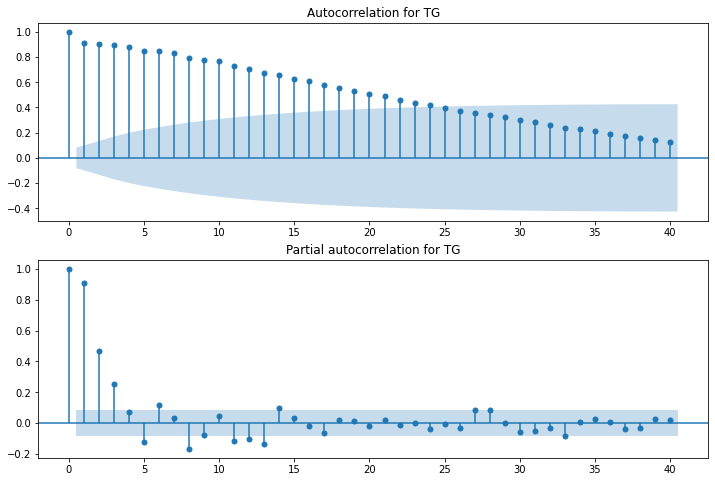

----------------------------------------------------------------------------------------------
ACF and PACF for  Tripura


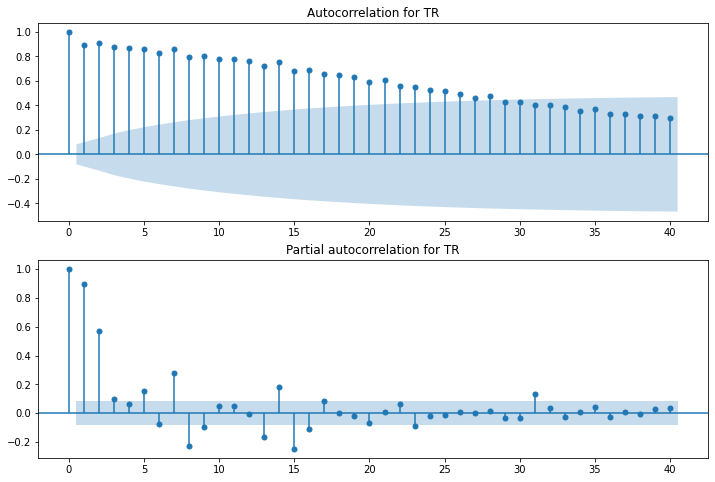

----------------------------------------------------------------------------------------------
ACF and PACF for  Uttar Pradesh


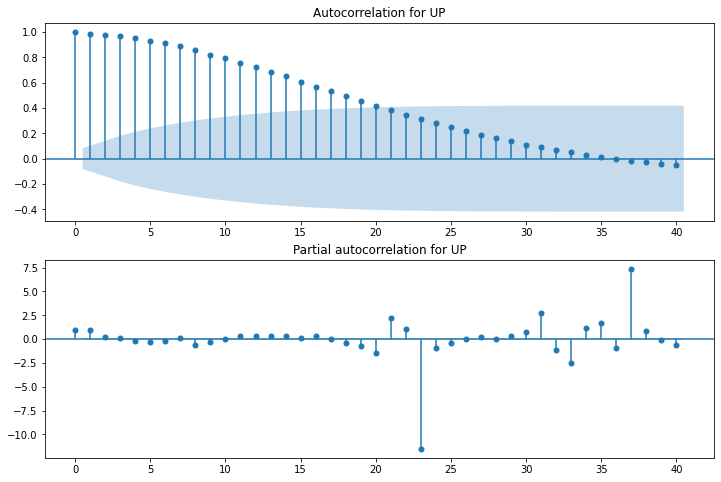

----------------------------------------------------------------------------------------------
ACF and PACF for  Uttarakhand


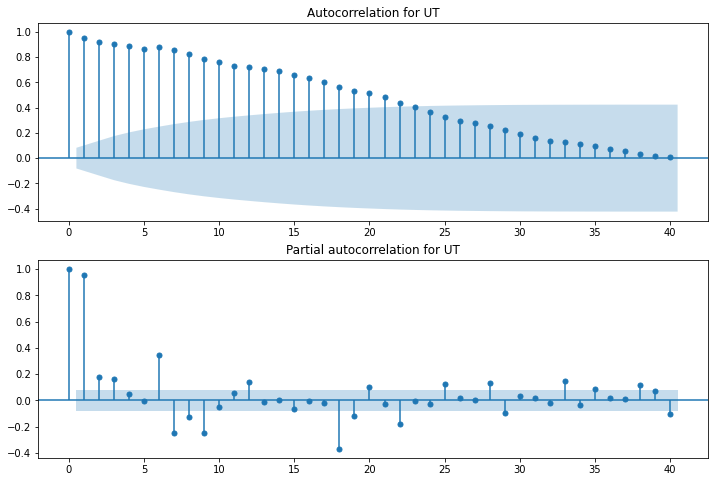

----------------------------------------------------------------------------------------------
ACF and PACF for  West Bengal


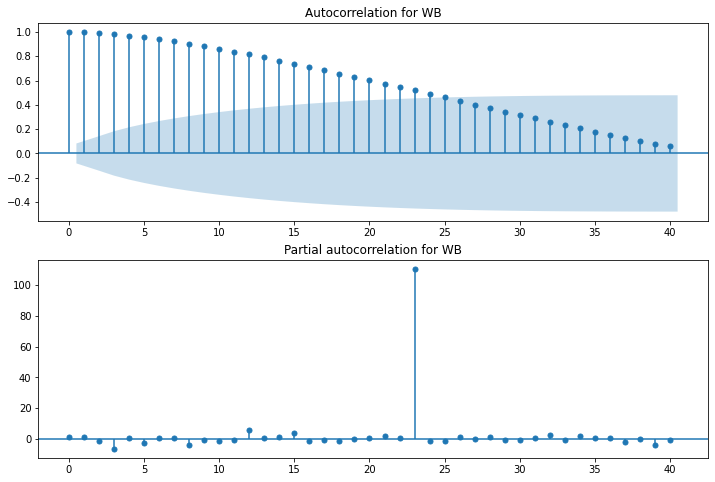

----------------------------------------------------------------------------------------------
ACF and PACF for  Union Territories
This feature cannot be plotted for autocorrelation and partial autocorrelation
----------------------------------------------------------------------------------------------


In [25]:
#plotting acf and pacf plots for region or state columns
for i in range(0,len(short_forms)):
    print('ACF and PACF for ',abbreviations[i])
    if (short_forms[i]!='DD'):
        if short_forms[i]!='UN':
            cols=short_forms[i]
            fig = plt.figure(figsize=(12,8))
            ax1 = fig.add_subplot(211)
            fig = plot_acf(data_frame[cols],lags=40,ax=ax1,title='Autocorrelation for '+cols)
            ax2 = fig.add_subplot(212)
            fig = plot_pacf(data_frame[cols],lags=40,ax=ax2,title='Partial autocorrelation for '+cols)
            plt.show()
        
        else:
            #'DD' feature cannot be plotted for acf and pacf due to the inconsistent values in it. It does not contain any value to plot
            print('This feature cannot be plotted for autocorrelation and partial autocorrelation')
    else:
        #'DD' feature cannot be plotted for acf and pacf due to the inconsistent values in it. It does not contain any value to plot
        print('This feature cannot be plotted for autocorrelation and partial autocorrelation')
    print('----------------------------------------------------------------------------------------------')

## Differencing the data and repeating the adfuller test for the features which are not stationary.

Test for  AR
test_statistic : -2.6198101794953357
p value : 0.08897163590438673
lags used : 18
number of observations used : 512
---------------------------------------------------
p value 0.08897163590438673
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


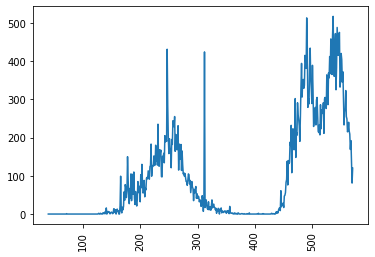

---------------------------------------------------------------------
Test for  AS
test_statistic : -2.274844461222371
p value : 0.18020951405802488
lags used : 18
number of observations used : 512
---------------------------------------------------
p value 0.18020951405802488
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


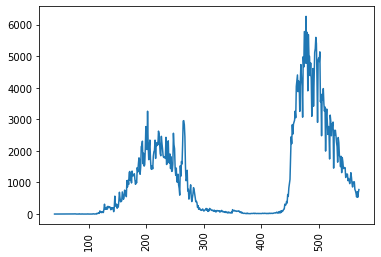

---------------------------------------------------------------------
Test for  CH
test_statistic : -2.581617860920955
p value : 0.09685630882719226
lags used : 11
number of observations used : 519
---------------------------------------------------
p value 0.09685630882719226
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


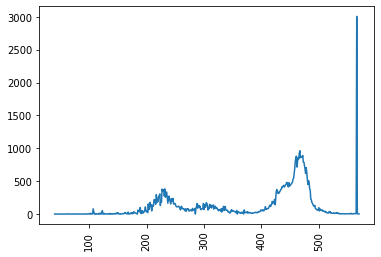

---------------------------------------------------------------------
Test for  CT
test_statistic : -2.709957710741543
p value : 0.07233094403943745
lags used : 19
number of observations used : 511
---------------------------------------------------
p value 0.07233094403943745
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


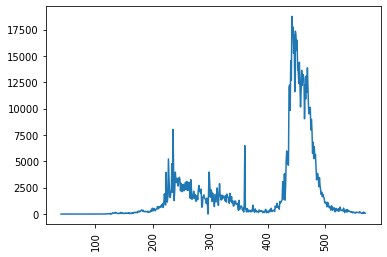

---------------------------------------------------------------------
Test for  DD
test_statistic : nan
p value : nan
lags used : 0
number of observations used : 530
---------------------------------------------------
p value nan
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


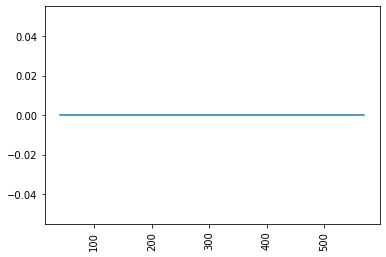

---------------------------------------------------------------------
Test for  KL
test_statistic : -1.561761731331832
p value : 0.5027679666601725
lags used : 4
number of observations used : 526
---------------------------------------------------
p value 0.5027679666601725
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


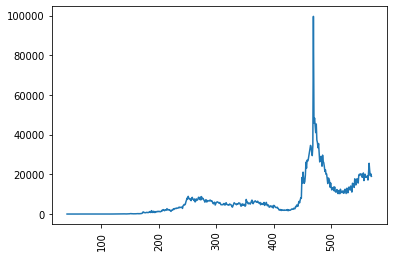

---------------------------------------------------------------------
Test for  LA
test_statistic : -2.22987530825336
p value : 0.1955816375889331
lags used : 6
number of observations used : 524
---------------------------------------------------
p value 0.1955816375889331
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


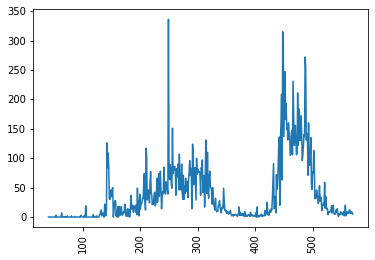

---------------------------------------------------------------------
Test for  LD
test_statistic : -2.9978559219869667
p value : 0.03509511590761663
lags used : 7
number of observations used : 523
---------------------------------------------------
p value 0.03509511590761663
Reject h0
It is stationary
Weak evidence that the given data is not stationary


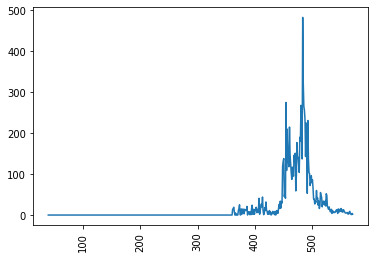

---------------------------------------------------------------------
Test for  MN
test_statistic : -0.9533610356545748
p value : 0.7698926734367975
lags used : 13
number of observations used : 517
---------------------------------------------------
p value 0.7698926734367975
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


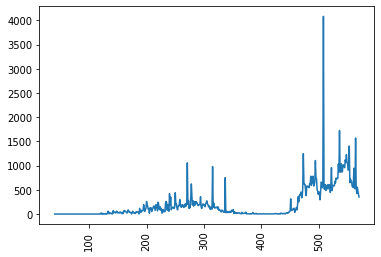

---------------------------------------------------------------------
Test for  ML
test_statistic : -1.5426177318058534
p value : 0.5123335892307346
lags used : 13
number of observations used : 517
---------------------------------------------------
p value 0.5123335892307346
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


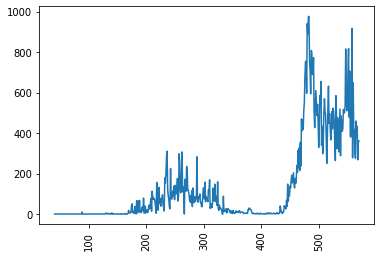

---------------------------------------------------------------------
Test for  MZ
test_statistic : -1.523530990626562
p value : 0.521840449489631
lags used : 19
number of observations used : 511
---------------------------------------------------
p value 0.521840449489631
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


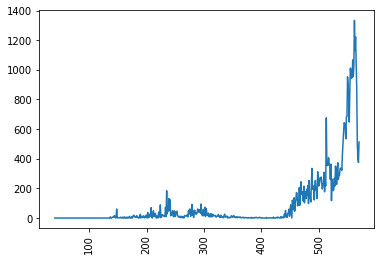

---------------------------------------------------------------------
Test for  NL
test_statistic : -2.292330722961909
p value : 0.17445339782840924
lags used : 18
number of observations used : 512
---------------------------------------------------
p value 0.17445339782840924
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


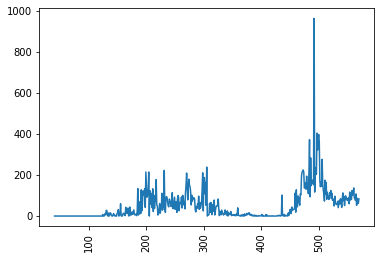

---------------------------------------------------------------------
Test for  SK
test_statistic : -1.7286261253450856
p value : 0.41642704410247317
lags used : 12
number of observations used : 518
---------------------------------------------------
p value 0.41642704410247317
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


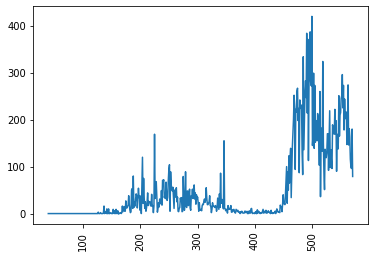

---------------------------------------------------------------------
Test for  TN
test_statistic : -2.2621783999253267
p value : 0.18445638568420186
lags used : 17
number of observations used : 513
---------------------------------------------------
p value 0.18445638568420186
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


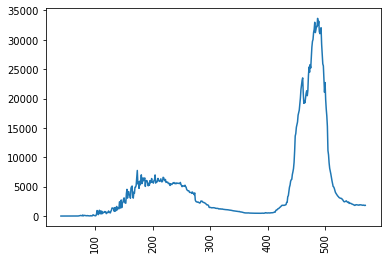

---------------------------------------------------------------------
Test for  TR
test_statistic : -2.4525822811306677
p value : 0.12744180946138428
lags used : 16
number of observations used : 514
---------------------------------------------------
p value 0.12744180946138428
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


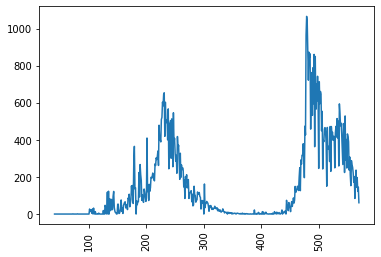

---------------------------------------------------------------------
Test for  WB
test_statistic : -2.728236711587627
p value : 0.06927823663889696
lags used : 3
number of observations used : 527
---------------------------------------------------
p value 0.06927823663889696
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


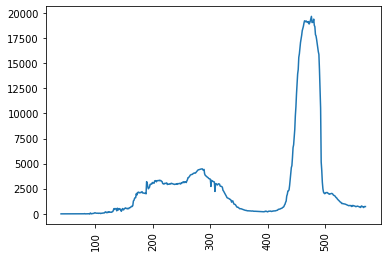

---------------------------------------------------------------------
Test for  UN
test_statistic : nan
p value : nan
lags used : 0
number of observations used : 530
---------------------------------------------------
p value nan
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


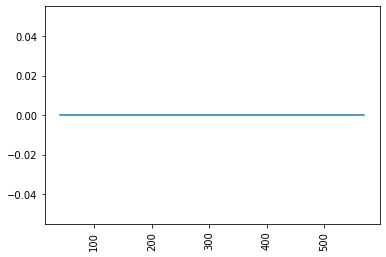

---------------------------------------------------------------------


In [26]:
#repeating adfuller test for the features which are not stationary.
for cols in non_stationary_cols:
    print('Test for ',cols)
    data=data_frame.copy()
    data[cols]=data[cols].shift(40)
    test=repeat_adfuller_test(data[cols].dropna())
    data[cols].plot()
    plt.xticks(rotation=90)
    plt.show()
    print('---------------------------------------------------------------------')

In [27]:
#function to find the features that can be stationary after differencing
def repeat_adfuller_test_cols_finding(data):
    cols_after_differencing=[]
    results=adfuller(data)
    h0='It is not stationary'
    h1='It is stationary'
    labels=['test_statistic','p value','lags used','number of observations used']
    #for lab,val in zip(labels,results[:4]):
    #    print('{} : {}'.format(lab,val))
    #print('---------------------------------------------------')   
    #print('p value',results[1])
    if results[1]<=0.05:
        print('Reject h0')
        print(h1)
        print('Weak evidence that the given data is not stationary')
        cols_after_differencing.append(data.name)
        #stationary_cols.append(data.name)
    #else:
        #print('Accecpt h0')
        #print(h0)
        #print('Strong evidence that the given data is not stationary')
        #non_stationary_cols.append(data.name)
    if len(cols_after_differencing)>0:
        print(cols_after_differencing)

In [34]:
#calling the function by iterating the shitf value from 0 to 100.
for i in range(0,100):
    #repeating adfuller test for the features which are not stationary.
    print('i: ',i)
    for cols in non_stationary_cols:
        #print('Test for ',cols)
        data=data_frame.copy()
        data[cols]=data[cols].shift(i)
        test=repeat_adfuller_test_cols_finding(data[cols].dropna())
        #data[cols].plot()
        #plt.xticks(rotation=90)
        #plt.show()
        #print('---------------------------------------------------------------------')
    #print(test)

i:  0
i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9
i:  10
i:  11
i:  12
i:  13
i:  14
i:  15
i:  16
i:  17
i:  18
i:  19
i:  20
i:  21
i:  22
i:  23
i:  24
i:  25
i:  26
i:  27
i:  28
i:  29
i:  30
i:  31
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['LD']
i:  32
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['LD']
i:  33
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['LD']
i:  34
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['LD']
i:  35
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['LD']
i:  36
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['CH']
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['LD']
i:  37
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['LD']
i:  38
Reject h0
It is stationary
Weak evidence that the

i:  83
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['CH']
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['LD']
i:  84
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['CH']
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['LD']
i:  85
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['CH']
i:  86
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['CH']
i:  87
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['CH']
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['LD']
i:  88
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['CH']
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['LD']
i:  89
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['CH']
Rejec

In [29]:
#function for the cols that are transformed to stationary data after differencing
def repeat_adfuller_test_cols_transformed(data):
    cols_after_differencing=[]
    results=adfuller(data)
    h0='It is not stationary'
    h1='It is stationary'
    labels=['test_statistic','p value','lags used','number of observations used']
    
    if results[1]<=0.05:
        for lab,val in zip(labels,results[:4]):
            print('{} : {}'.format(lab,val))
        print('---------------------------------------------------')   
        print('p value',results[1])
        print('Reject h0')
        print(h1)
        print('Weak evidence that the given data is not stationary')
        cols_after_differencing.append(data.name)
        #stationary_cols.append(data.name)
    #else:
        #print('Accecpt h0')
        #print(h0)
        #print('Strong evidence that the given data is not stationary')
        #non_stationary_cols.append(data.name)

Test for  AN
test_statistic : -3.4859208037411977
p value : 0.008356126038308594
lags used : 17
number of observations used : 482
---------------------------------------------------
p value 0.008356126038308594
Reject h0
It is stationary
Weak evidence that the given data is not stationary


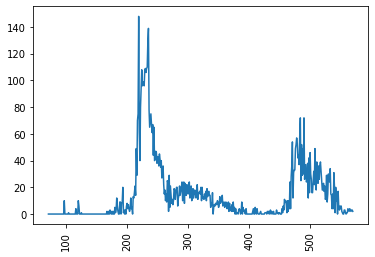

Plotting autocorrelation and partial autocorrelation for  AN


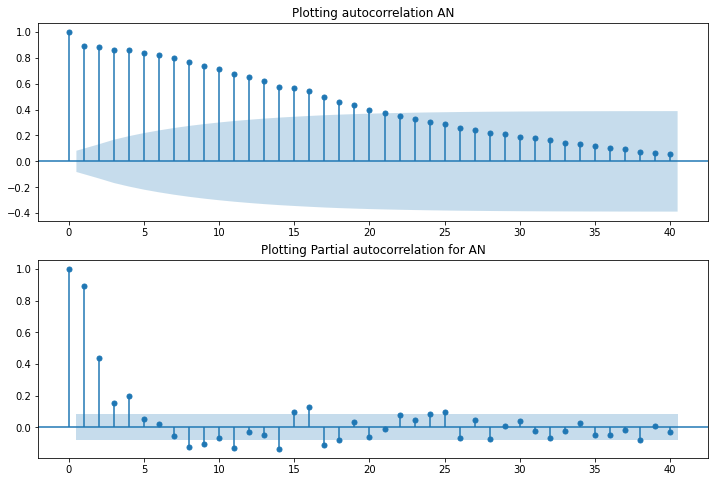

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
Test for  CH
test_statistic : -3.099374173878488
p value : 0.026599537097441367
lags used : 11
number of observations used : 488
---------------------------------------------------
p value 0.026599537097441367
Reject h0
It is stationary
Weak evidence that the given data is not stationary


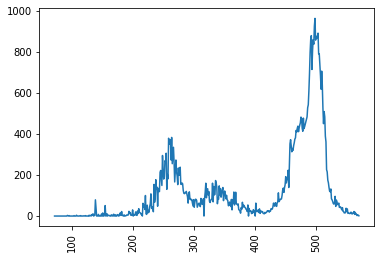

Plotting autocorrelation and partial autocorrelation for  CH


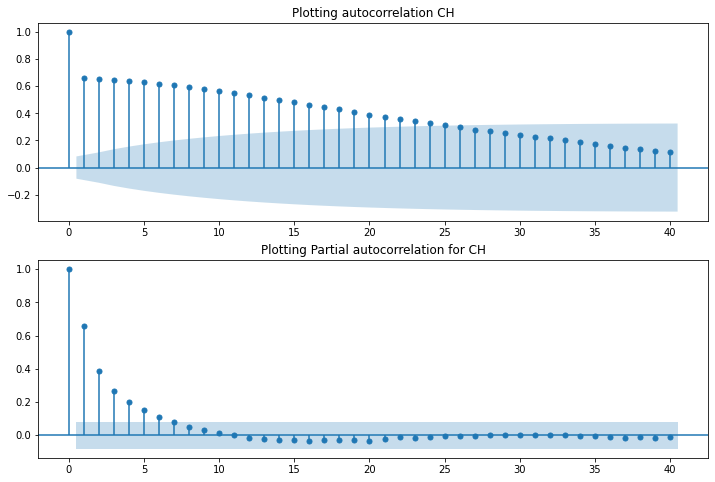

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
Test for  HR
test_statistic : -2.952448539988464
p value : 0.03958009319794122
lags used : 16
number of observations used : 483
---------------------------------------------------
p value 0.03958009319794122
Reject h0
It is stationary
Weak evidence that the given data is not stationary


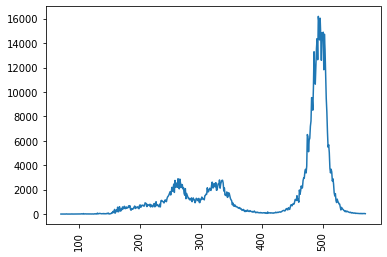

Plotting autocorrelation and partial autocorrelation for  HR


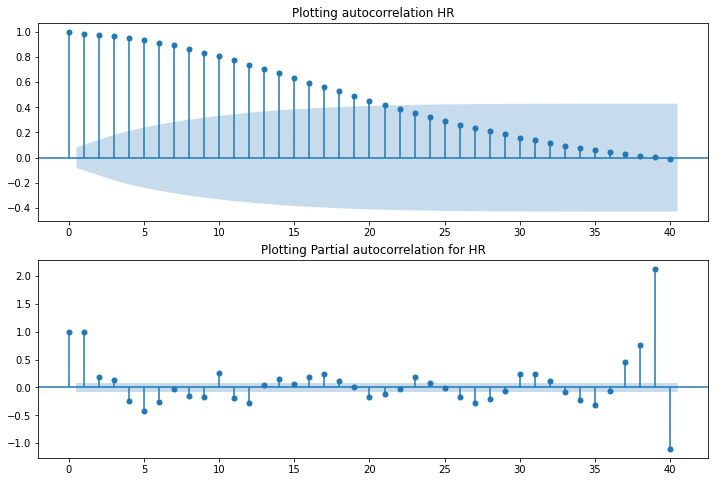

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
Test for  TG
test_statistic : -2.896140309666365
p value : 0.045798671426827454
lags used : 13
number of observations used : 486
---------------------------------------------------
p value 0.045798671426827454
Reject h0
It is stationary
Weak evidence that the given data is not stationary


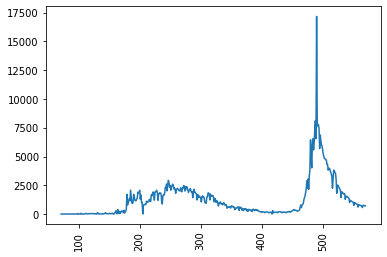

Plotting autocorrelation and partial autocorrelation for  TG


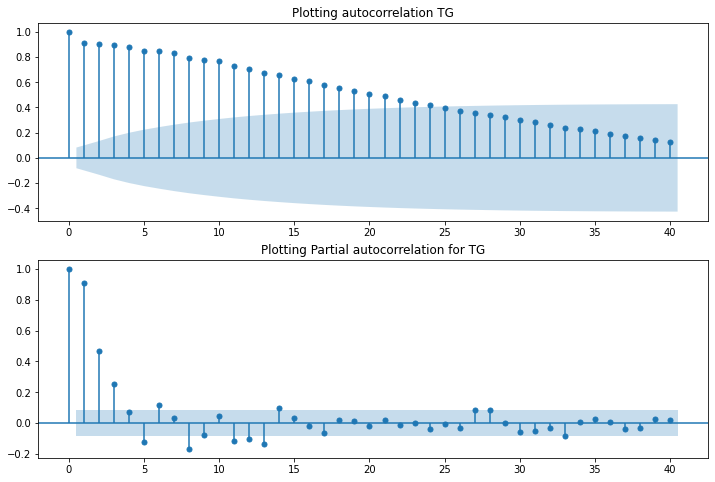

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------


In [32]:
for cols in ['AN','CH','HR','TG']:
    print('Test for ',cols)
    data=data_frame.copy()
    data[cols]=data[cols].shift(71)
    test=repeat_adfuller_test_cols_transformed(data[cols].dropna())
    data[cols].plot()
    plt.xticks(rotation=90)
    plt.show()
    print('Plotting autocorrelation and partial autocorrelation for ',cols)
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = plot_acf(data_frame[cols],lags=40,ax=ax1,title='Plotting autocorrelation '+cols)
    ax2 = fig.add_subplot(212)
    fig = plot_pacf(data_frame[cols],lags=40,ax=ax2,title='Plotting Partial autocorrelation for '+cols)
    plt.show()
    print('-----------------------------------------------------------------------------------------------')
    print('-----------------------------------------------------------------------------------------------')